In [9]:
import os
import tqdm
import numpy as np
import pandas as pd

In [10]:
path_to_root = '../../..'
path_to_results = os.path.join(path_to_root,'results')
path_to_sample_data = os.path.join(path_to_root,'data/imagery-7-25_cropped_419_sample')
results_csv = os.path.join(path_to_results,'results_validation_fasterRCNN-07-27.csv')

In [53]:
iou_thres = 0.0

In [54]:
df = pd.read_csv(results_csv)

df['TN@IoU0']=np.where(df.ground_truth.isnull() & ((df.iou <= iou_thres) | df.predicted.isnull()), '1', '0')
df['TN@IoU0'] = df['TN@IoU0'].apply(lambda x: int(x))
df.head()

,Unnamed: 0,image,ground_truth,predicted,confidence,size,iou,tp@IoU0.0,fp@IoU0.0,fn@IoU0.0,TN@IoU0
0,0,107712.png,[315 311 333 337],[308 311 328 338],0.2847,468.0,0.5228,1,0,0,0
1,1,112998.png,[132 116 201 216],[117 130 219 209],0.9600,6900.0,0.5767,1,0,0,0
2,2,94711.png,[230 218 245 256],[242 248 267 283],0.0976,570.0,0.0236,1,0,0,0
3,3,111965.png,[150 131 186 206],[135 153 197 180],0.9132,2700.0,0.2927,1,0,0,0
4,4,1459-1095_not_a_dam.png,NaN,[242 246 257 263],0.1054,NaN,NaN,0,1,0,0


In [55]:
df.head(20)

,Unnamed: 0,image,ground_truth,predicted,confidence,size,iou,tp@IoU0.0,fp@IoU0.0,fn@IoU0.0,TN@IoU0
0,0,107712.png,[315 311 333 337],[308 311 328 338],0.2847,468.0,0.5228,1,0,0,0
1,1,112998.png,[132 116 201 216],[117 130 219 209],0.9600,6900.0,0.5767,1,0,0,0
2,2,94711.png,[230 218 245 256],[242 248 267 283],0.0976,570.0,0.0236,1,0,0,0
3,3,111965.png,[150 131 186 206],[135 153 197 180],0.9132,2700.0,0.2927,1,0,0,0
4,4,1459-1095_not_a_dam.png,NaN,[242 246 257 263],0.1054,NaN,NaN,0,1,0,0
5,5,5964.png,[199 193 260 266],[192 183 257 251],0.8160,4453.0,0.6149,1,0,0,0
6,6,114594.png,[116 116 144 143],[101 137 121 150],0.1285,756.0,0.0395,1,0,0,0
7,7,95534.png,[186 181 218 223],[181 187 228 226],0.8735,1344.0,0.5765,1,0,0,0
8,8,121480.png,[219 207 269 281],[210 216 289 276],0.7283,3700.0,0.5561,1,0,0,0
9,9,110442.png,[252 274 311 289],[270 249 290 312],0.3859,885.0,0.1707,1,0,0,0


In [56]:
df['ground_truth'][3]

'[150 131 186 206]'

In [ ]:
## Classfication TP, FN, etc Wrong (e.g line 18)

##### Check IoU


In [148]:
e = get_iou([150,131,186,206],[135,153,197,180])
e

0.7987126974839087

In [145]:
df['IoU'] = get_iou(df['ground_truth'],df['predicted'])

ValueError: too many values to unpack (expected 4)

# Utils

In [141]:
def get_iou(bb1, bb2):
    """
    Calculate the Intersection over Union (IoU) of two bounding boxes.
    Adapted from: https://stackoverflow.com/questions/25349178/calculating-percentage-of-bounding-box-overlap-for-image-detector-evaluation
    Args:
        bb1: [x_min, y_min, width_of_box, height_of_box]
        bb2: [x_min, y_min, width_of_box, height_of_box]
    These will be converted to
    bb1: [x1,y1,x2,y2]
    bb2: [x1,y1,x2,y2]
    The (x1, y1) position is at the top left corner (or the bottom right - either way works).
    The (x2, y2) position is at the bottom right corner (or the top left).
    Returns:
        intersection_over_union, a float in [0, 1]
    """
    
    bb1 = convert_xwyh_to_xyxy(bb1)
    bb2 = convert_xwyh_to_xyxy(bb2)

    assert bb1[0] < bb1[2]
    assert bb1[1] < bb1[3]

    assert bb2[0] < bb2[2]
    assert bb2[1] < bb2[3]

    # Determine the coordinates of the intersection rectangle
    x_left = max(bb1[0], bb2[0])
    y_top = max(bb1[1], bb2[1])
    x_right = min(bb1[2], bb2[2])
    y_bottom = min(bb1[3], bb2[3])

    if x_right < x_left or y_bottom < y_top:
        return 0.0

    # The intersection of two axis-aligned bounding boxes is always an
    # axis-aligned bounding box
    intersection_area = (x_right - x_left) * (y_bottom - y_top)

    # Compute the area of both AABBs
    bb1_area = (bb1[2] - bb1[0]) * (bb1[3] - bb1[1])
    bb2_area = (bb2[2] - bb2[0]) * (bb2[3] - bb2[1])

    # Compute the intersection over union by taking the intersection
    # area and dividing it by the sum of prediction + ground-truth
    # areas - the intersection area.
    iou = intersection_area / float(bb1_area + bb2_area - intersection_area)
    assert iou >= 0.0
    assert iou <= 1.0
    return iou

In [143]:
def convert_xwyh_to_xyxy(api_bbox):
    """
    Converts an xywh bounding box to an xyxy bounding box.
    
    Note that this is also different from the TensorFlow Object Detection API coords format.
    Args:
        api_bbox: bbox output by the batch processing API [x_min, y_min, width_of_box, height_of_box]
    Returns:
        bbox with coordinates represented as [x_min, y_min, x_max, y_max]
    """
    
    x_min, y_min, width_of_box, height_of_box = api_bbox
    x_max, y_max = x_min + width_of_box, y_min + height_of_box
    return [x_min, y_min, x_max, y_max]

In [113]:
for iou_thres in [0.1]:
    df['tp@IoU'+str(iou_thres)] = np.where((df.iou > iou_thres), '1', '0')
    df['fp@IoU'+str(iou_thres)] = np.where((df.iou <= iou_thres) | (df.predicted.notnull() & df.ground_truth.isnull()), '1', '0')
    df['fn@IoU'+str(iou_thres)] = np.where((df.iou <= iou_thres) | (df.predicted.isnull() & df.ground_truth.notnull()), '1', '0')

In [117]:
iou_thresh = 0

In [126]:
df['TN@IoU0']=np.where(df.ground_truth.isnull() & ((df.iou <= iou_thres) | df.predicted.isnull()), '1', '0')

In [132]:
df['TN@IoU0'] = df['TN@IoU0'].apply(lambda x: int(x))

In [104]:
len(df)

6565

In [133]:
df['TN@IoU0'].sum()

155

In [125]:
df['fp@IoU0.0'].sum()

2178

In [134]:
df['tp@IoU0.0'].sum()

4216

In [135]:
df['fn@IoU0.0'].sum()

1456

In [136]:
df['fn@IoU0.0'].sum() + df['tp@IoU0.0'].sum() + df['fp@IoU0.0'].sum() + df['TN@IoU0'].sum()

8005

In [118]:
df['GT_bool'] = np.where(df.ground_truth.notnull(), '1', '0')
df['pred'] = np.where(df.iou > iou_thresh, '1', '0')

In [83]:
from sklearn.metrics import precision_recall_curve, confusion_matrix, average_precision_score, precision_score, recall_score

In [91]:
y_pred

array(['1', '1', '1', ..., '1', '1', '1'], dtype='<U1')

In [119]:
y_true = np.where(df.ground_truth.notnull(), '1', '0')
y_pred = np.where(df.iou > iou_thresh, '1', '0')


confusion_matrix(y_true, y_pred)

array([[ 893,    0],
       [1456, 4216]])

In [100]:
#precision = tp / (tp+fp)

5656 / (5656+16)

0.997179125528914

In [98]:
recall_score(df['GT_bool'], df['pred'],pos_label=str('1'))

0.997179125528914

In [99]:
precision_score(df['GT_bool'], df['pred'],pos_label=str('1'))

0.8845792930872693

In [77]:
#Compute average precision (AP) from prediction scores
#AP summarizes a precision-recall curve
average_precision_score(df['GT_bool'], df['iou'].fillna(0),pos_label='1')

0.9650826013489924

In [80]:
precision, recall, _ = precision_recall_curve(df['GT_bool'], df['iou'].fillna(0),pos_label='1')

Text(0, 0.5, 'Precision')

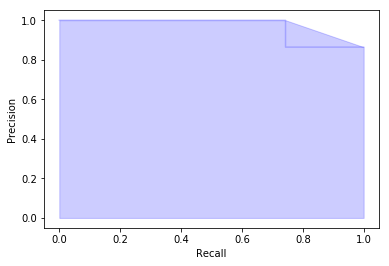

In [82]:
import matplotlib.pyplot as plt
#from inspect import signature
%matplotlib inline

plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, alpha=0.2, color='b')#, **step_kwargs)

plt.xlabel('Recall')
plt.ylabel('Precision')

### Visualize images: Render GT+predicted bboxes on images

In [27]:
from IPython.display import Image
#from run_tf_detector import *
import PIL
import humanfriendly
import matplotlib
#matplotlib.use('TkAgg')
import matplotlib.image as mpimg
import matplotlib.patches as patches
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np

## IMPORTANT to avoid $DISPLAY problems:
import matplotlib
matplotlib.use('Agg')
% matplotlib inline

UsageError: Line magic function `%` not found.


In [41]:
DEFAULT_CONFIDENCE_THRESHOLD = 0.2

# Stick this into filenames before the extension for the rendered result
DETECTION_FILENAME_INSERT = '_detections2'

BOX_COLORS = ['b','g','r']
DEFAULT_LINE_WIDTH = 4
SHOW_CONFIDENCE_VALUES = False

In [68]:
string= '[[prot]]'

new = string.replace('[','').replace(']','')

new

'prot'

In [67]:
def parse_bbox_str_to_list(bbox_str):
    '''Parse [a b c d] to [a,b,c,d]'''
    bbox_without_brackets = bbox_str.replace('[','').replace(']','')
    vals = bbox_without_brackets.split(' ')
    bbox_list = [float(vals[0]),float(vals[1]),float(vals[2]),float(vals[3])]
    return bbox_list

def convert_bbox_pixel_to_norm(bbox_list,imgSize=419):
    '''Convert bbox_list from _pixel to normalized'''
    return [i/imgSize for i in bbox_list]

In [42]:
inputFileName = os.path.join(path_to_sample_data,'111965.png')

truth = [150/419,131/419,186/419,206/419]
pred = [135,153,197,180]
score = 0.555
classLabel = '0'

render_bounding_box(truth, score, classLabel, inputFileName)

In [36]:
def render_bounding_box(box, score, classLabel, inputFileName, outputFileName=None,
                          confidenceThreshold=DEFAULT_CONFIDENCE_THRESHOLD,linewidth=DEFAULT_LINE_WIDTH):
    """
    Convenience wrapper to apply render_bounding_boxes to a single image
    """
    outputFileNames = []
    if outputFileName is not None:
        outputFileNames = [outputFileName]
    scores = [[score]]
    boxes = [[box]]
    render_bounding_boxes(boxes,scores,[classLabel],[inputFileName],outputFileNames,
                          confidenceThreshold,linewidth)

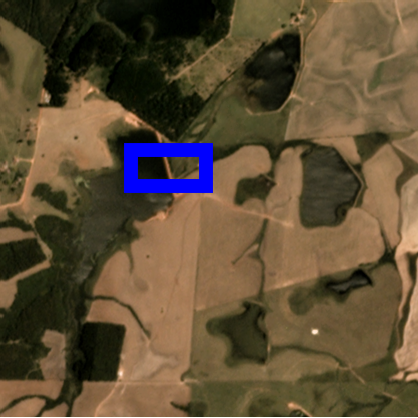

In [44]:
i = os.path.join(path_to_sample_data,'111965_detections2.png')

display(Image(i))

In [6]:
def render_bounding_boxes(boxes, scores, classes, inputFileNames, outputFileNames=[],
                          confidenceThreshold=DEFAULT_CONFIDENCE_THRESHOLD, linewidth=DEFAULT_LINE_WIDTH):
    """
    Render bounding boxes on the image files specified in [inputFileNames].  
    
    [boxes] and [scores] should be in the format returned by generate_detections, 
    specifically [top, left, bottom, right] in normalized units, where the
    origin is the upper-left.    
    
    "classes" is currently unused, it's a placeholder for adding text annotations
    later.
    """

    nImages = len(inputFileNames)
    iImage = 0

    for iImage in range(0,nImages):

        inputFileName = inputFileNames[iImage]

        if iImage >= len(outputFileNames):
            outputFileName = ''
        else:
            outputFileName = outputFileNames[iImage]

        if len(outputFileName) == 0:
            name, ext = os.path.splitext(inputFileName)
            outputFileName = "{}{}{}".format(name,DETECTION_FILENAME_INSERT,ext)

        image = mpimg.imread(inputFileName)
        iBox = 0; box = boxes[iImage][iBox]
        dpi = 100
        s = image.shape; imageHeight = s[0]; imageWidth = s[1]
        figsize = imageWidth / float(dpi), imageHeight / float(dpi)

        plt.figure(figsize=figsize)
        ax = plt.axes([0,0,1,1])
        
        # Display the image
        ax.imshow(image)
        ax.set_axis_off()
    
        # plt.show()
        for iBox,box in enumerate(boxes[iImage]):

            score = scores[iImage][iBox]
            if score < confidenceThreshold:
                continue

            # top, left, bottom, right 
            #
            # x,y origin is the upper-left
            topRel = box[0]
            leftRel = box[1]
            bottomRel = box[2]
            rightRel = box[3]
            
            x = leftRel * imageWidth
            y = topRel * imageHeight
            w = (rightRel-leftRel) * imageWidth
            h = (bottomRel-topRel) * imageHeight
            
            # Location is the bottom-left of the rect
            #
            # Origin is the upper-left
            iLeft = x
            iBottom = y
            iClass = int(classes[iImage][iBox])
            
            boxColor = BOX_COLORS[iClass % len(BOX_COLORS)]
            rect = patches.Rectangle((iLeft,iBottom),w,h,linewidth=linewidth,edgecolor=boxColor,
                                     facecolor='none')
            
            # Add the patch to the Axes
            ax.add_patch(rect)        
            
            if SHOW_CONFIDENCE_VALUES:
                pLabel = 'Class {} ({:.2f})'.format(iClass,score)
                ax.text(iLeft+5,iBottom+5,pLabel,color=boxColor,fontsize=12,
                        verticalalignment='top',bbox=dict(facecolor='black'))
            
        # ...for each box

        # This is magic goop that removes whitespace around image plots (sort of)        
        plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, hspace = 0, 
                            wspace = 0)
        plt.margins(0,0)
        ax.xaxis.set_major_locator(ticker.NullLocator())
        ax.yaxis.set_major_locator(ticker.NullLocator())
        ax.axis('tight')
        ax.set(xlim=[0,imageWidth],ylim=[imageHeight,0],aspect=1)
        plt.axis('off')                

        # plt.savefig(outputFileName, bbox_inches='tight', pad_inches=0.0, dpi=dpi, transparent=True)
        plt.savefig(outputFileName, dpi=dpi, transparent=True, optimize=True, quality=90)
        plt.close()
        # os.startfile(outputFileName)


In [ ]:
for filename in os.listdir(outputDir):
    i = os.path.join(outputDir, filename)
    print(filename)
    display(Image(i))